In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
from scipy.cluster.hierarchy import linkage,dendrogram

In [2]:
def get_dim(Im):
    """Takes an image as an input and gives dimensions for pixels (width and height)"""
    return Image.open(Im).size

In [3]:
def get_xy(Im):
    """Take an image and return all possible (x,y) coordinate combinations"""
    width, height = Image.open(Im).size
    return list(product(np.arange(width),np.arange(height)))

In [4]:
def get_rgb(Im):
    """Take an image and return rgb values for every pixel"""
    im = Image.open(Im) 
    pix = im.load()
    rgb = [pix[i,j] for i,j in get_xy(Im)]
    return rgb

In [5]:
def get_data(Im):
    """Take an image and extract all the coordinates and RGB values of each pixel. Returns a data frame 
    containing that information"""
    img_data = list(zip(get_xy(Im),get_rgb(Im)))
    df = []
    for i in img_data:
        columns = {'x':i[0][0],'y':i[0][1],'R':i[1][0],'G':i[1][1],'B':i[1][2]}
        df.append(columns)
    return pd.DataFrame(df)

In [6]:
def resize(Im,size,name):
    """Take an image and resize it. Takes the original Image Im as input, and resizes to the size specified and 
    outputs a new image with name chosen"""
    image = Image.open(Im)
    new_image = image.resize(size)
    new_image.save(name)

In [7]:
def plotter(Im, axis = None, title = None):
    """Take an image and get density plot for rgb values"""
    df = get_data(Im) 
    df = df.iloc[:,2:]
    palt = {'R':'red','G':'green','B':'blue'}
    df = df.melt(value_vars = ['R','G','B'])
    df.columns.values[0] = 'RGB'
    sns.kdeplot(data = df, hue = 'RGB', x = 'value', palette = palt, ax = axis).set(title = title)

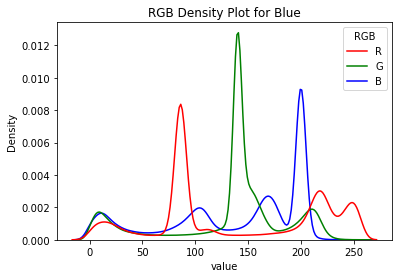

In [8]:
plotter('BLUE.jpeg', title = 'RGB Density Plot for Blue')

In [9]:
resize('BLUE.jpeg',(100,100),"BLUEs.png")

In [10]:
df = get_data('BLUE.jpeg')

In [22]:
df_AQUA = get_data('AQUA.png')

In [29]:
df_AQUA.iloc[:,2:5]

,R,G,B
0,96,198,191
1,87,194,187
2,78,185,180
3,73,183,182
4,69,183,184
...,...,...,...
562495,0,163,160
562496,0,163,160
562497,1,164,161
562498,1,164,162


In [30]:
df_AQUA =df_AQUA.iloc[:,2:5]

In [31]:
df_AQUA.to_csv("Aqua-Data.csv", sep=',', index=False, encoding='utf-8')

In [33]:
df_GREEN = get_data('GREEN.png')

In [35]:
df_GREEN.to_csv("Green-Data.csv", sep=',', index=False, encoding='utf-8')

In [36]:
df_RED = get_data('RED.png')

In [37]:
df_RED.to_csv("Red-Data.csv", sep=',', index=False, encoding='utf-8')

In [38]:
df_ORANGE = get_data('ORANGE.png')

In [39]:
df_ORANGE.to_csv("Orange-Data.csv", sep=',', index=False, encoding='utf-8')

In [13]:
df
df.to_csv("Blue-Data.csv", sep=',', index=False, encoding='utf-8')

In [23]:
df = df.iloc[:,2:]
df

,R,G,B
0,86,140,200
1,86,140,200
2,86,140,200
3,86,140,200
4,86,140,200
...,...,...,...
562495,86,140,200
562496,86,140,200
562497,86,140,200
562498,86,140,200


In [24]:
df = df.melt(value_vars = ['R','G','B'])
df.columns.values[0] = 'RGB'
df

,RGB,value
0,R,86
1,R,86
2,R,86
3,R,86
4,R,86
...,...,...
1687495,B,200
1687496,B,200
1687497,B,200
1687498,B,200


In [26]:
palt = {'R':'red','G':'green','B':'blue'}

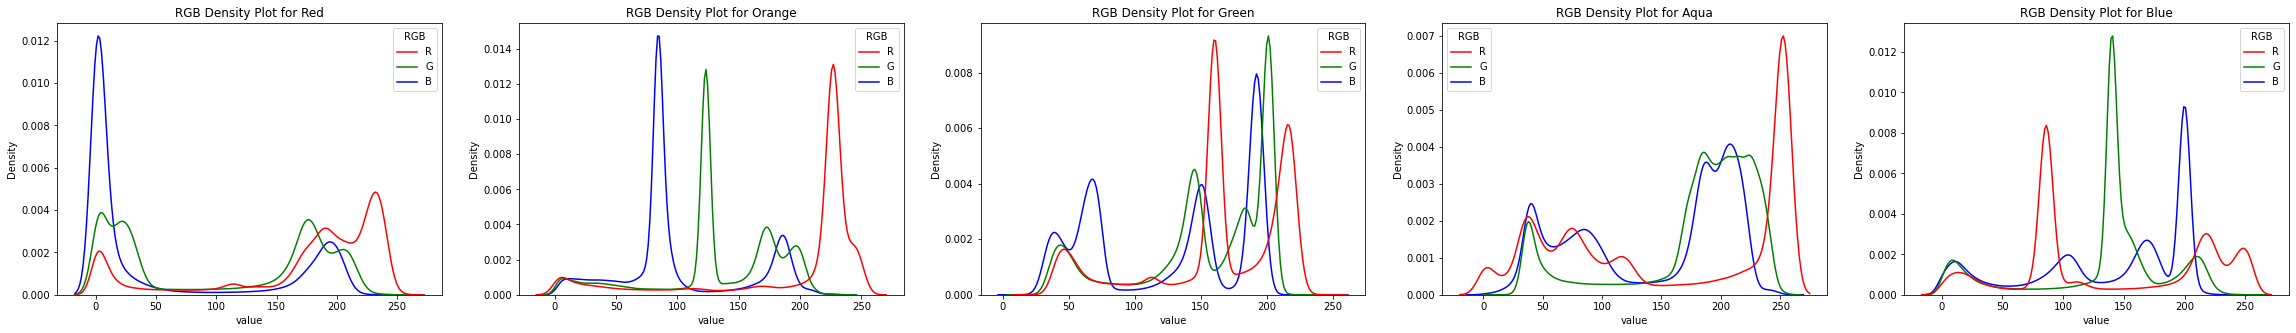

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=5,figsize = (40,5))
plotter('RED.png', axis = ax[0], title = 'RGB Density Plot for Red')
plotter('ORANGE.png', axis = ax[1], title = 'RGB Density Plot for Orange')
plotter('GREEN.png', axis = ax[2], title = 'RGB Density Plot for Green')
plotter('AQUA.png', axis = ax[3], title = 'RGB Density Plot for Aqua')
plotter('BLUE.jpeg', axis = ax[4], title = 'RGB Density Plot for Blue')